In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
sampling = np.linspace(336, 1020, 343)

In [3]:
def normalize(spectra):
    min1 = min(spectra)
    max1 = max(spectra)
    # Normalizar los espectros al rango de 0 a 1
    return (spectra - min1) / (max1 - min1)

## Normalize

In [4]:
df1 = pd.read_csv("./calibrated_data/Suspected_SY.csv")
df1['flux'] = df1['flux'].apply(lambda x: np.array([float(i) for i in x.strip('[]').split()]))
df1['flux'] = df1['flux'].apply(lambda x: normalize(x))

dfluxes = pd.DataFrame(df1['flux'].tolist(), columns=range(343))

out_dir = './normalized'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
fullname = os.path.join(out_dir, "Suspected_SY.csv")

dfluxes.to_csv(fullname, header=False, index=False)
print(dfluxes.shape[0])

15


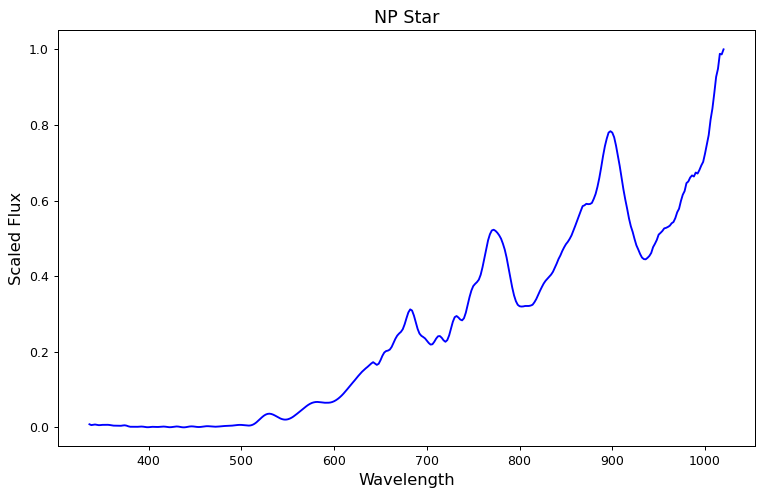

In [8]:
# % matplotlib inline
plt.subplots(figsize=(10, 6), dpi=90)

# Create line plot
plt.plot(sampling, dfluxes.iloc[13], c='blue')

# Set labels and title
plt.xlabel('Wavelength', fontsize=13)
plt.ylabel('Scaled Flux', fontsize=13)
plt.title('NP Star', fontsize=14)
# Display the plot
plt.show()